In [1]:
import pandas as pd
import numpy as np

import fastf1 as ff1

import matplotlib as mpl
from matplotlib import pyplot as plt
from matplotlib import colormaps
from matplotlib.collections import LineCollection
import matplotlib.animation as animation
import fastf1.plotting

# # Load FastF1's dark color scheme
fastf1.plotting.setup_mpl(mpl_timedelta_support=False, 
                          misc_mpl_mods=False,
                          color_scheme='fastf1')

/Users/noviechiuman/miniconda3/envs/f1_streamlit/lib/python3.13/site-packages/fastf1/plotting/_plotting.py:57: FutureWarning: The `misc_mpl_mods` argument was dropped from `.setup_mpl()` in version 3.6.0 and has no effect anymore. It will be removed in a future version of FastF1.
  warnings.warn(


In [2]:
fastf1.Cache.enable_cache("~/Desktop/fast_f1/Caches/fastf1")

In [3]:
fastf1.get_event_schedule(2025)["Location"].unique()

array(['Sakhir', 'Melbourne', 'Shanghai', 'Suzuka', 'Jeddah', 'Miami',
       'Imola', 'Monaco', 'Barcelona', 'Montréal', 'Spielberg',
       'Silverstone', 'Spa-Francorchamps', 'Budapest', 'Zandvoort',
       'Monza', 'Baku', 'Marina Bay', 'Austin', 'Mexico City',
       'São Paulo', 'Las Vegas', 'Lusail', 'Yas Island'], dtype=object)

In [4]:
session = fastf1.get_session(2025, "Montréal", "R")
session.load(telemetry=True, laps=True, weather=False)

core           INFO 	Loading data for Canadian Grand Prix - Race [v3.6.0]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['63', '1', '12', '81', '16', '44', '14', '27', '31', '55', '87', '22', '43', '5', '10', '6', '18', '4', '30', '23']


In [5]:
brake_test_lap = session.laps.pick_lap(68)
brake_test_lap.info()

<class 'fastf1.core.Laps'>
Index: 17 entries, 67 to 1347
Data columns (total 31 columns):
 #   Column              Non-Null Count  Dtype          
---  ------              --------------  -----          
 0   Time                17 non-null     timedelta64[ns]
 1   Driver              17 non-null     object         
 2   DriverNumber        17 non-null     object         
 3   LapTime             17 non-null     timedelta64[ns]
 4   LapNumber           17 non-null     float64        
 5   Stint               17 non-null     float64        
 6   PitOutTime          17 non-null     timedelta64[ns]
 7   PitInTime           17 non-null     timedelta64[ns]
 8   Sector1Time         17 non-null     timedelta64[ns]
 9   Sector2Time         17 non-null     timedelta64[ns]
 10  Sector3Time         17 non-null     timedelta64[ns]
 11  Sector1SessionTime  17 non-null     timedelta64[ns]
 12  Sector2SessionTime  17 non-null     timedelta64[ns]
 13  Sector3SessionTime  17 non-null     timedelta64[ns

/Users/noviechiuman/miniconda3/envs/f1_streamlit/lib/python3.13/site-packages/fastf1/core.py:3137: FutureWarning: pick_lap is deprecated and will be removed in a future release. Use pick_laps instead.
  warnings.warn(("pick_lap is deprecated and will be removed in a "


/Users/noviechiuman/miniconda3/envs/f1_streamlit/lib/python3.13/site-packages/fastf1/core.py:3137: FutureWarning: pick_lap is deprecated and will be removed in a future release. Use pick_laps instead.
  warnings.warn(("pick_lap is deprecated and will be removed in a "
req            INFO 	Using cached data for driver_info
/Users/noviechiuman/miniconda3/envs/f1_streamlit/lib/python3.13/site-packages/fastf1/core.py:3137: FutureWarning: pick_lap is deprecated and will be removed in a future release. Use pick_laps instead.
  warnings.warn(("pick_lap is deprecated and will be removed in a "


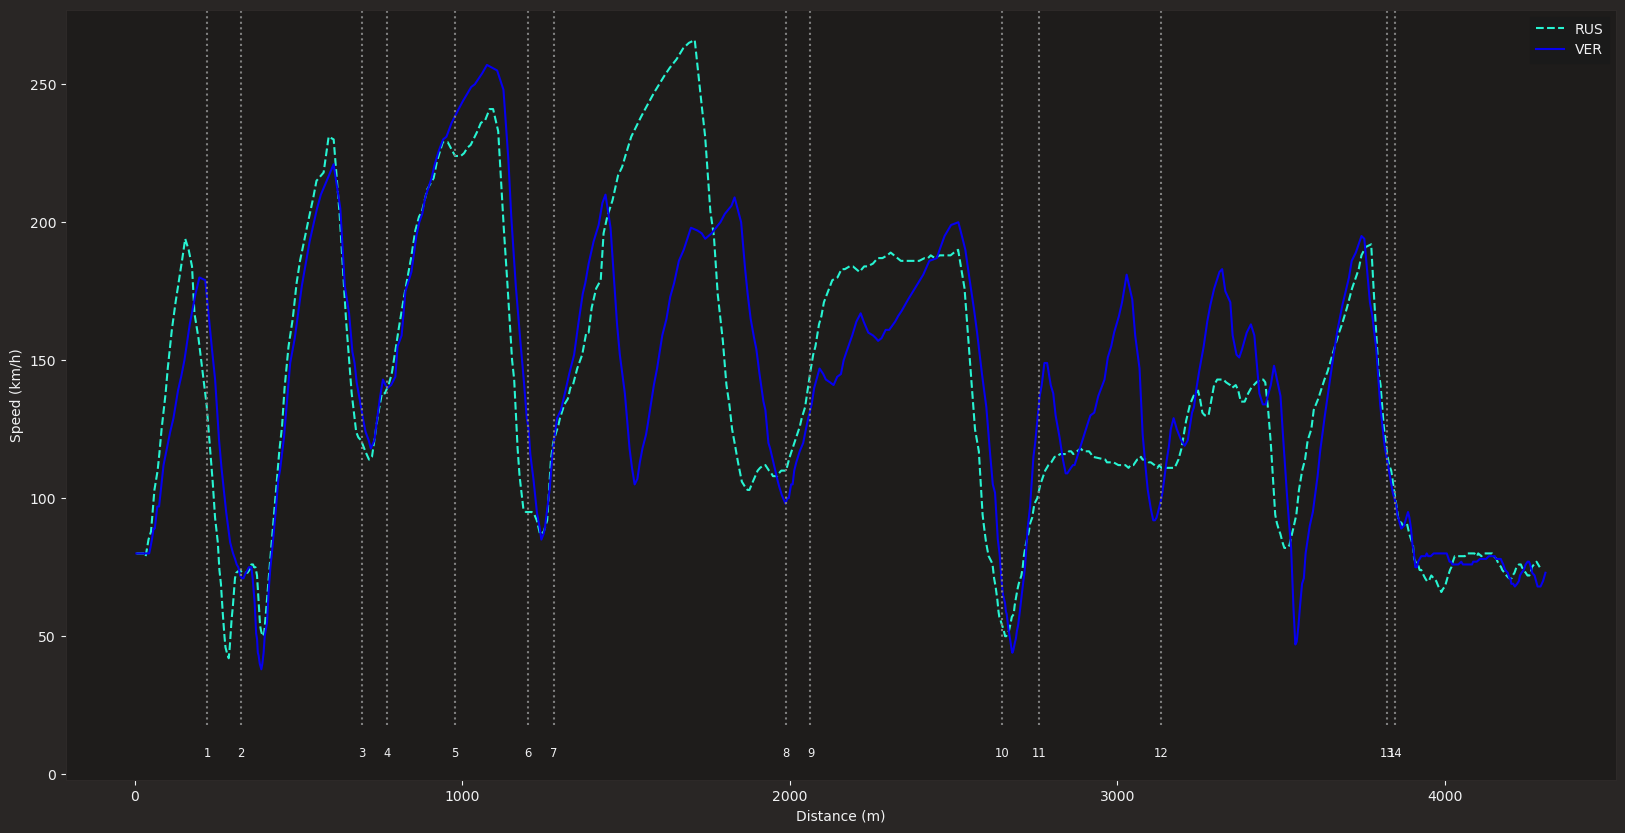

In [6]:
fig, ax = plt.subplots(figsize=(20, 10))

circuit_info = session.get_circuit_info()

for driver in ('RUS', 'VER'):
    telemetry = session.laps.pick_drivers(driver).pick_lap(68)
    car_data = telemetry.get_car_data().add_distance()

    style = fastf1.plotting.get_driver_style(identifier=driver,
                                             style=['color', 'linestyle'],
                                             session=session)
    
    ax.plot(car_data['Distance'], 
            car_data['Speed'],
            **style, 
            label=driver)

# Draw vertical dotted lines at each corner that range from slightly below the
# minimum speed to slightly above the maximum speed.
v_min = car_data['Speed'].min()
v_max = car_data['Speed'].max()
ax.vlines(x=circuit_info.corners['Distance'], 
            ymin=v_min-20, 
            ymax=v_max+20,
            linestyles='dotted', 
            colors='grey')

# Plot the corner number just below each vertical line.
# For corners that are very close together, the text may overlap. A more
# complicated approach would be necessary to reliably prevent this.
for _, corner in circuit_info.corners.iterrows():
    txt = f"{corner['Number']}{corner['Letter']}"
    ax.text(corner['Distance'], 
            v_min-30, txt,
            va='center_baseline', 
            ha='center', 
            size='small')

ax.set_xlabel('Distance (m)')
ax.set_ylabel('Speed (km/h)')
ax.legend()

# Manually adjust the y-axis limits to include the corner numbers, because
# Matplotlib does not automatically account for text that was manually added.
ax.set_ylim([v_min - 40, v_max + 20])
    
plt.show()

In [7]:
russell_laps_telemetry = session.laps.pick_drivers("RUS").pick_lap(68)
verstappen_laps_telemetry = session.laps.pick_drivers("VER").pick_lap(68)

/Users/noviechiuman/miniconda3/envs/f1_streamlit/lib/python3.13/site-packages/fastf1/core.py:3137: FutureWarning: pick_lap is deprecated and will be removed in a future release. Use pick_laps instead.
  warnings.warn(("pick_lap is deprecated and will be removed in a "


In [8]:
# Filter telemetry data for brake test zone (3000-4000m)
rus_brake_zone = russell_laps_telemetry.telemetry[
    (russell_laps_telemetry.telemetry['Distance'] >= 3250) & 
    (russell_laps_telemetry.telemetry['Distance'] <= 3750)
]

ver_brake_zone = verstappen_laps_telemetry.telemetry[
    (verstappen_laps_telemetry.telemetry['Distance'] >= 3250) & 
    (verstappen_laps_telemetry.telemetry['Distance'] <= 3750)
]

# Extract coordinates and data
rus_x = rus_brake_zone['X']
rus_y = rus_brake_zone['Y']
rus_speed = rus_brake_zone['Speed']
rus_distance = rus_brake_zone['Distance']
rus_time = rus_brake_zone['SessionTime']

ver_x = ver_brake_zone['X']
ver_y = ver_brake_zone['Y']
ver_speed = ver_brake_zone['Speed']
ver_distance = ver_brake_zone['Distance']
ver_time = ver_brake_zone['SessionTime']

# Convert time to seconds
rus_time_seconds = rus_time.dt.total_seconds()
ver_time_seconds = ver_time.dt.total_seconds()

In [9]:
rus_brake_zone

,Date,SessionTime,DriverAhead,DistanceToDriverAhead,Time,RPM,Speed,nGear,Throttle,Brake,DRS,Source,Distance,RelativeDistance,Status,X,Y,Z
669,2025-06-15 19:30:08.678,0 days 02:25:03.623000,,0.560833,0 days 00:01:29.193000,9658.337459,137.068749,3,0.000000,True,1,pos,3250.589938,0.756693,OnTrack,1327.000000,11169.000000,130.000000
670,2025-06-15 19:30:08.735,0 days 02:25:03.680000,,0.560833,0 days 00:01:29.250000,9622.000000,136.000000,3,0.000000,True,1,car,3252.721389,0.757190,OnTrack,1332.231442,11147.954186,129.905056
671,2025-06-15 19:30:08.935,0 days 02:25:03.880000,,0.560833,0 days 00:01:29.450000,9454.000000,131.000000,3,13.000000,True,1,car,3259.999167,0.758884,OnTrack,1344.942267,11095.088094,129.259199
672,2025-06-15 19:30:09.058,0 days 02:25:04.003000,,0.560833,0 days 00:01:29.573000,9466.979875,130.381911,3,23.507518,True,1,pos,3264.444955,0.759919,OnTrack,1354.000000,11056.000000,129.000000
673,2025-06-15 19:30:09.134,0 days 02:25:04.079000,,0.560833,0 days 00:01:29.649000,9475.000000,130.000000,3,30.000000,False,1,car,3267.185278,0.760557,OnTrack,1360.983332,11025.625940,128.954336
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
770,2025-06-15 19:30:22.138,0 days 02:25:17.083000,,3.336111,0 days 00:01:42.653000,11309.449779,179.552497,4,67.029998,False,1,pos,3727.046562,0.867606,OnTrack,2403.000000,6569.000000,130.000000
771,2025-06-15 19:30:22.218,0 days 02:25:17.163000,,3.336111,0 days 00:01:42.733000,11401.449779,180.952497,4,67.829998,False,1,pos,3731.132013,0.868557,OnTrack,2412.000000,6530.000000,130.000000
772,2025-06-15 19:30:22.335,0 days 02:25:17.280000,,3.336111,0 days 00:01:42.850000,11536.000000,183.000000,4,69.000000,False,1,car,3737.164167,0.869961,OnTrack,2424.240387,6478.352291,129.907510
773,2025-06-15 19:30:22.495,0 days 02:25:17.440000,,3.336111,0 days 00:01:43.010000,11714.000000,188.000000,4,69.000000,False,1,car,3745.519722,0.871906,OnTrack,2443.998016,6396.012718,129.932352


In [10]:
def rotate(xy, *, angle):
    rot_mat = np.array([[np.cos(angle), np.sin(angle)],
                        [-np.sin(angle), np.cos(angle)]])
    return np.matmul(xy, rot_mat)

In [11]:
# Get circuit info for rotation and corners
circuit_info = session.get_circuit_info()
track_angle = circuit_info.rotation / 180 * np.pi

# Rotate both drivers' coordinates
rus_rotated = rotate(np.array([rus_x, rus_y]).T, angle=track_angle)
ver_rotated = rotate(np.array([ver_x, ver_y]).T, angle=track_angle)

In [12]:
def create_advanced_dual_animation():
    """
    Advanced animation with speed-colored trajectories and real-time speed comparison
    """
    fig, ax1 = plt.subplots(figsize=(20, 10))
    
    # Trajectory comparison
    all_x = list(rus_x) + list(ver_x)
    all_y = list(rus_y) + list(ver_y)
    
    ax1.set_xlim(min(all_x) - 50, max(all_x) + 50)
    ax1.set_ylim(min(all_y) - 50, max(all_y) + 50)
    ax1.set_xlabel('X Coordinate (m)')
    ax1.set_ylabel('Y Coordinate (m)')
    ax1.set_title('Track Position')
    ax1.grid(True, alpha=0.3)
    
    # Initialize trajectory elements
    rus_line, = ax1.plot([], [], 'turquoise', linewidth=3, alpha=0.7, label='RUS')
    rus_point, = ax1.plot([], [], 'turquoise', markersize=12)
    ver_line, = ax1.plot([], [], 'blue', linewidth=3, alpha=0.7, label='VER')
    ver_point, = ax1.plot([], [], 'blue', markersize=5)
    ax1.legend()
    
    # Info text
    info_text = fig.text(0.5, 0.02, '', ha='center', fontsize=12,
                        bbox=dict(boxstyle='round', facecolor='lightyellow', alpha=0.8))
    
    min_len = min(len(rus_x), len(ver_x))
    
    def animate(frame):
        if frame >= min_len:
            frame = min_len - 1
        
        # Update trajectories
        rus_line.set_data(rus_x[:frame+1], rus_y[:frame+1])
        rus_point.set_data([rus_x.iloc[frame]], [rus_y.iloc[frame]])
        ver_line.set_data(ver_x[:frame+1], ver_y[:frame+1])
        ver_point.set_data([ver_x.iloc[frame]], [ver_y.iloc[frame]])
        
        
        return (rus_line, rus_point, ver_line, ver_point, info_text)
    
    ani = animation.FuncAnimation(fig, animate, frames=min_len, 
                                interval=100, blit=True, repeat=True)
    
    ani.save('movement.gif', writer='pillow', fps=10)

    return ani

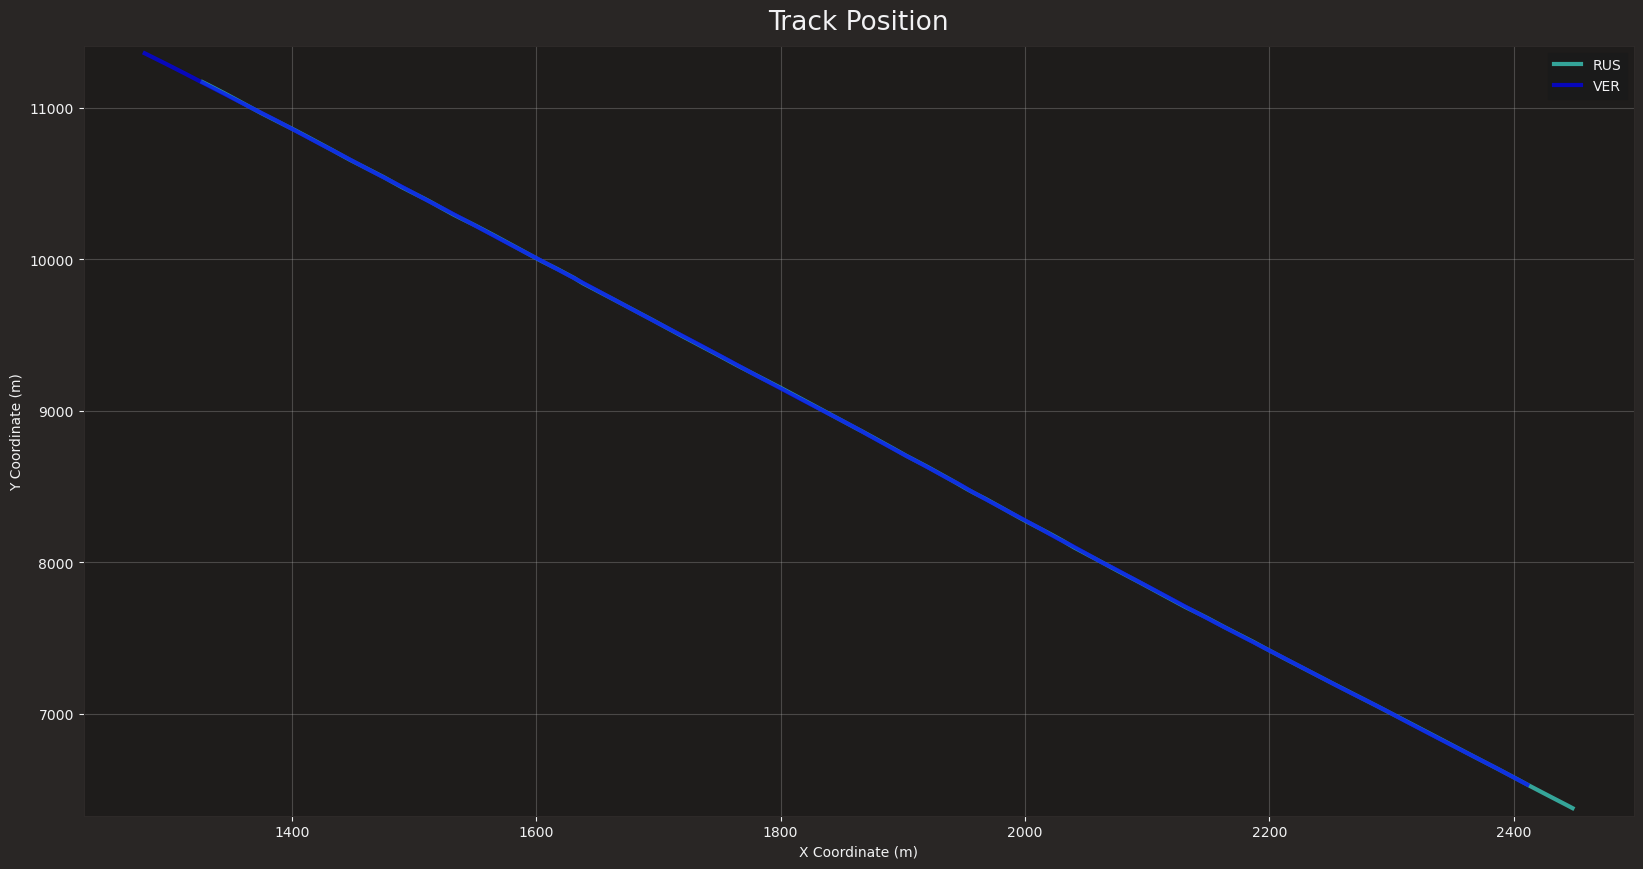

In [13]:
create_advanced_dual_animation()

/Users/noviechiuman/miniconda3/envs/f1_streamlit/lib/python3.13/site-packages/fastf1/core.py:3137: FutureWarning: pick_lap is deprecated and will be removed in a future release. Use pick_laps instead.
  warnings.warn(("pick_lap is deprecated and will be removed in a "
/Users/noviechiuman/miniconda3/envs/f1_streamlit/lib/python3.13/site-packages/fastf1/core.py:3137: FutureWarning: pick_lap is deprecated and will be removed in a future release. Use pick_laps instead.
  warnings.warn(("pick_lap is deprecated and will be removed in a "


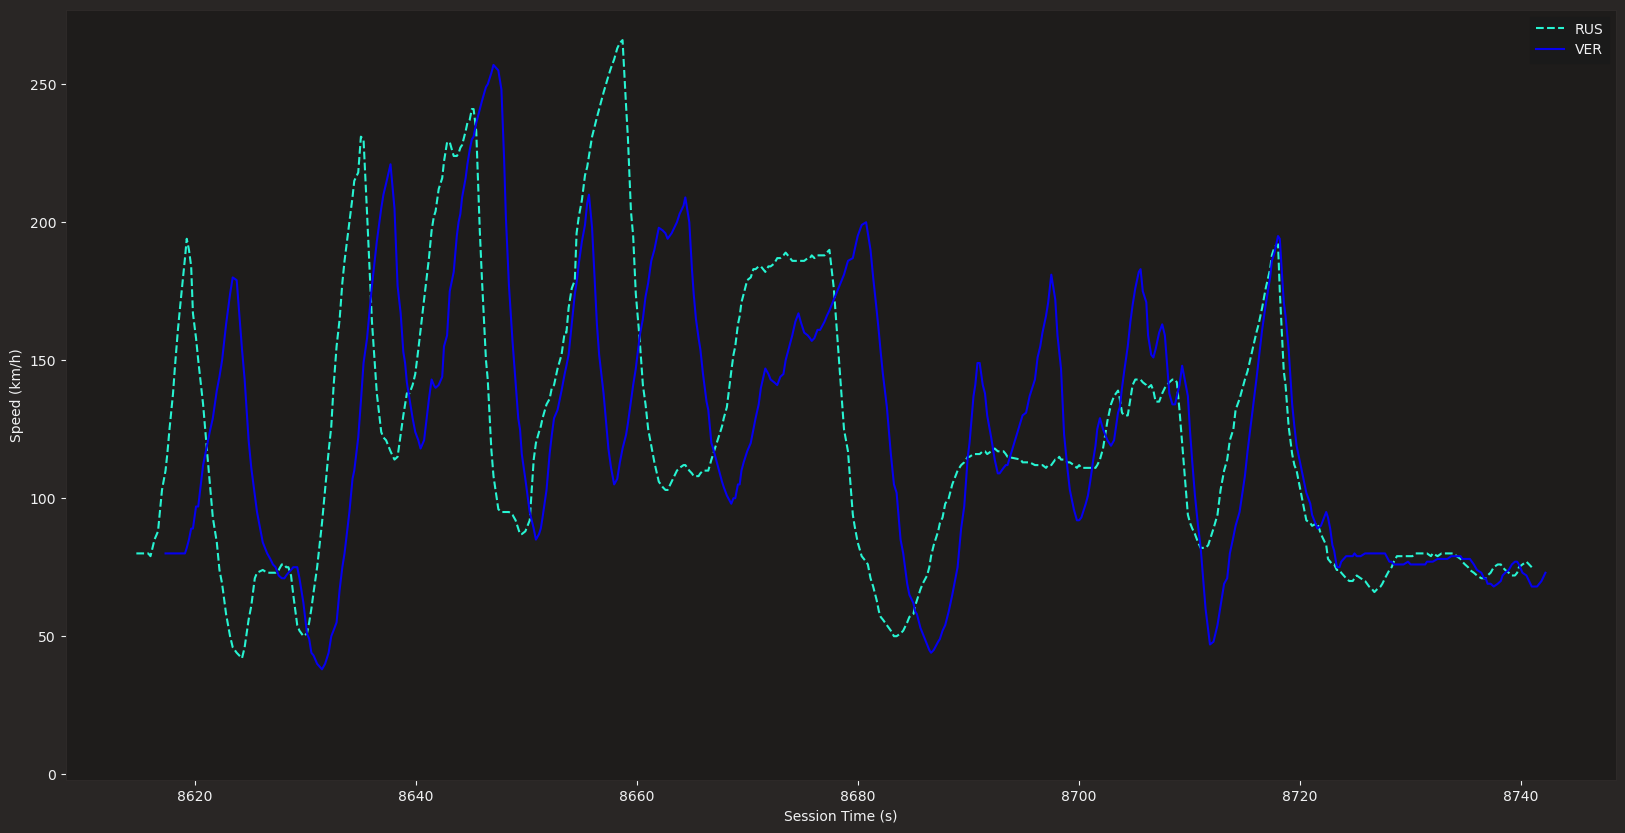

In [14]:
fig, ax = plt.subplots(figsize=(20, 10))

circuit_info = session.get_circuit_info()

for driver in ('RUS', 'VER'):
    telemetry = session.laps.pick_drivers(driver).pick_lap(68)
    car_data = telemetry.get_car_data().add_distance()

    style = fastf1.plotting.get_driver_style(identifier=driver,
                                             style=['color', 'linestyle'],
                                             session=session)
    
    ax.plot(car_data['SessionTime'].dt.total_seconds(), 
            car_data['Speed'],
            **style, 
            label=driver)

ax.set_xlabel('Session Time (s)')
ax.set_ylabel('Speed (km/h)')
ax.legend()

# Manually adjust the y-axis limits to include the corner numbers, because
# Matplotlib does not automatically account for text that was manually added.
ax.set_ylim([v_min - 40, v_max + 20])
    
plt.show()